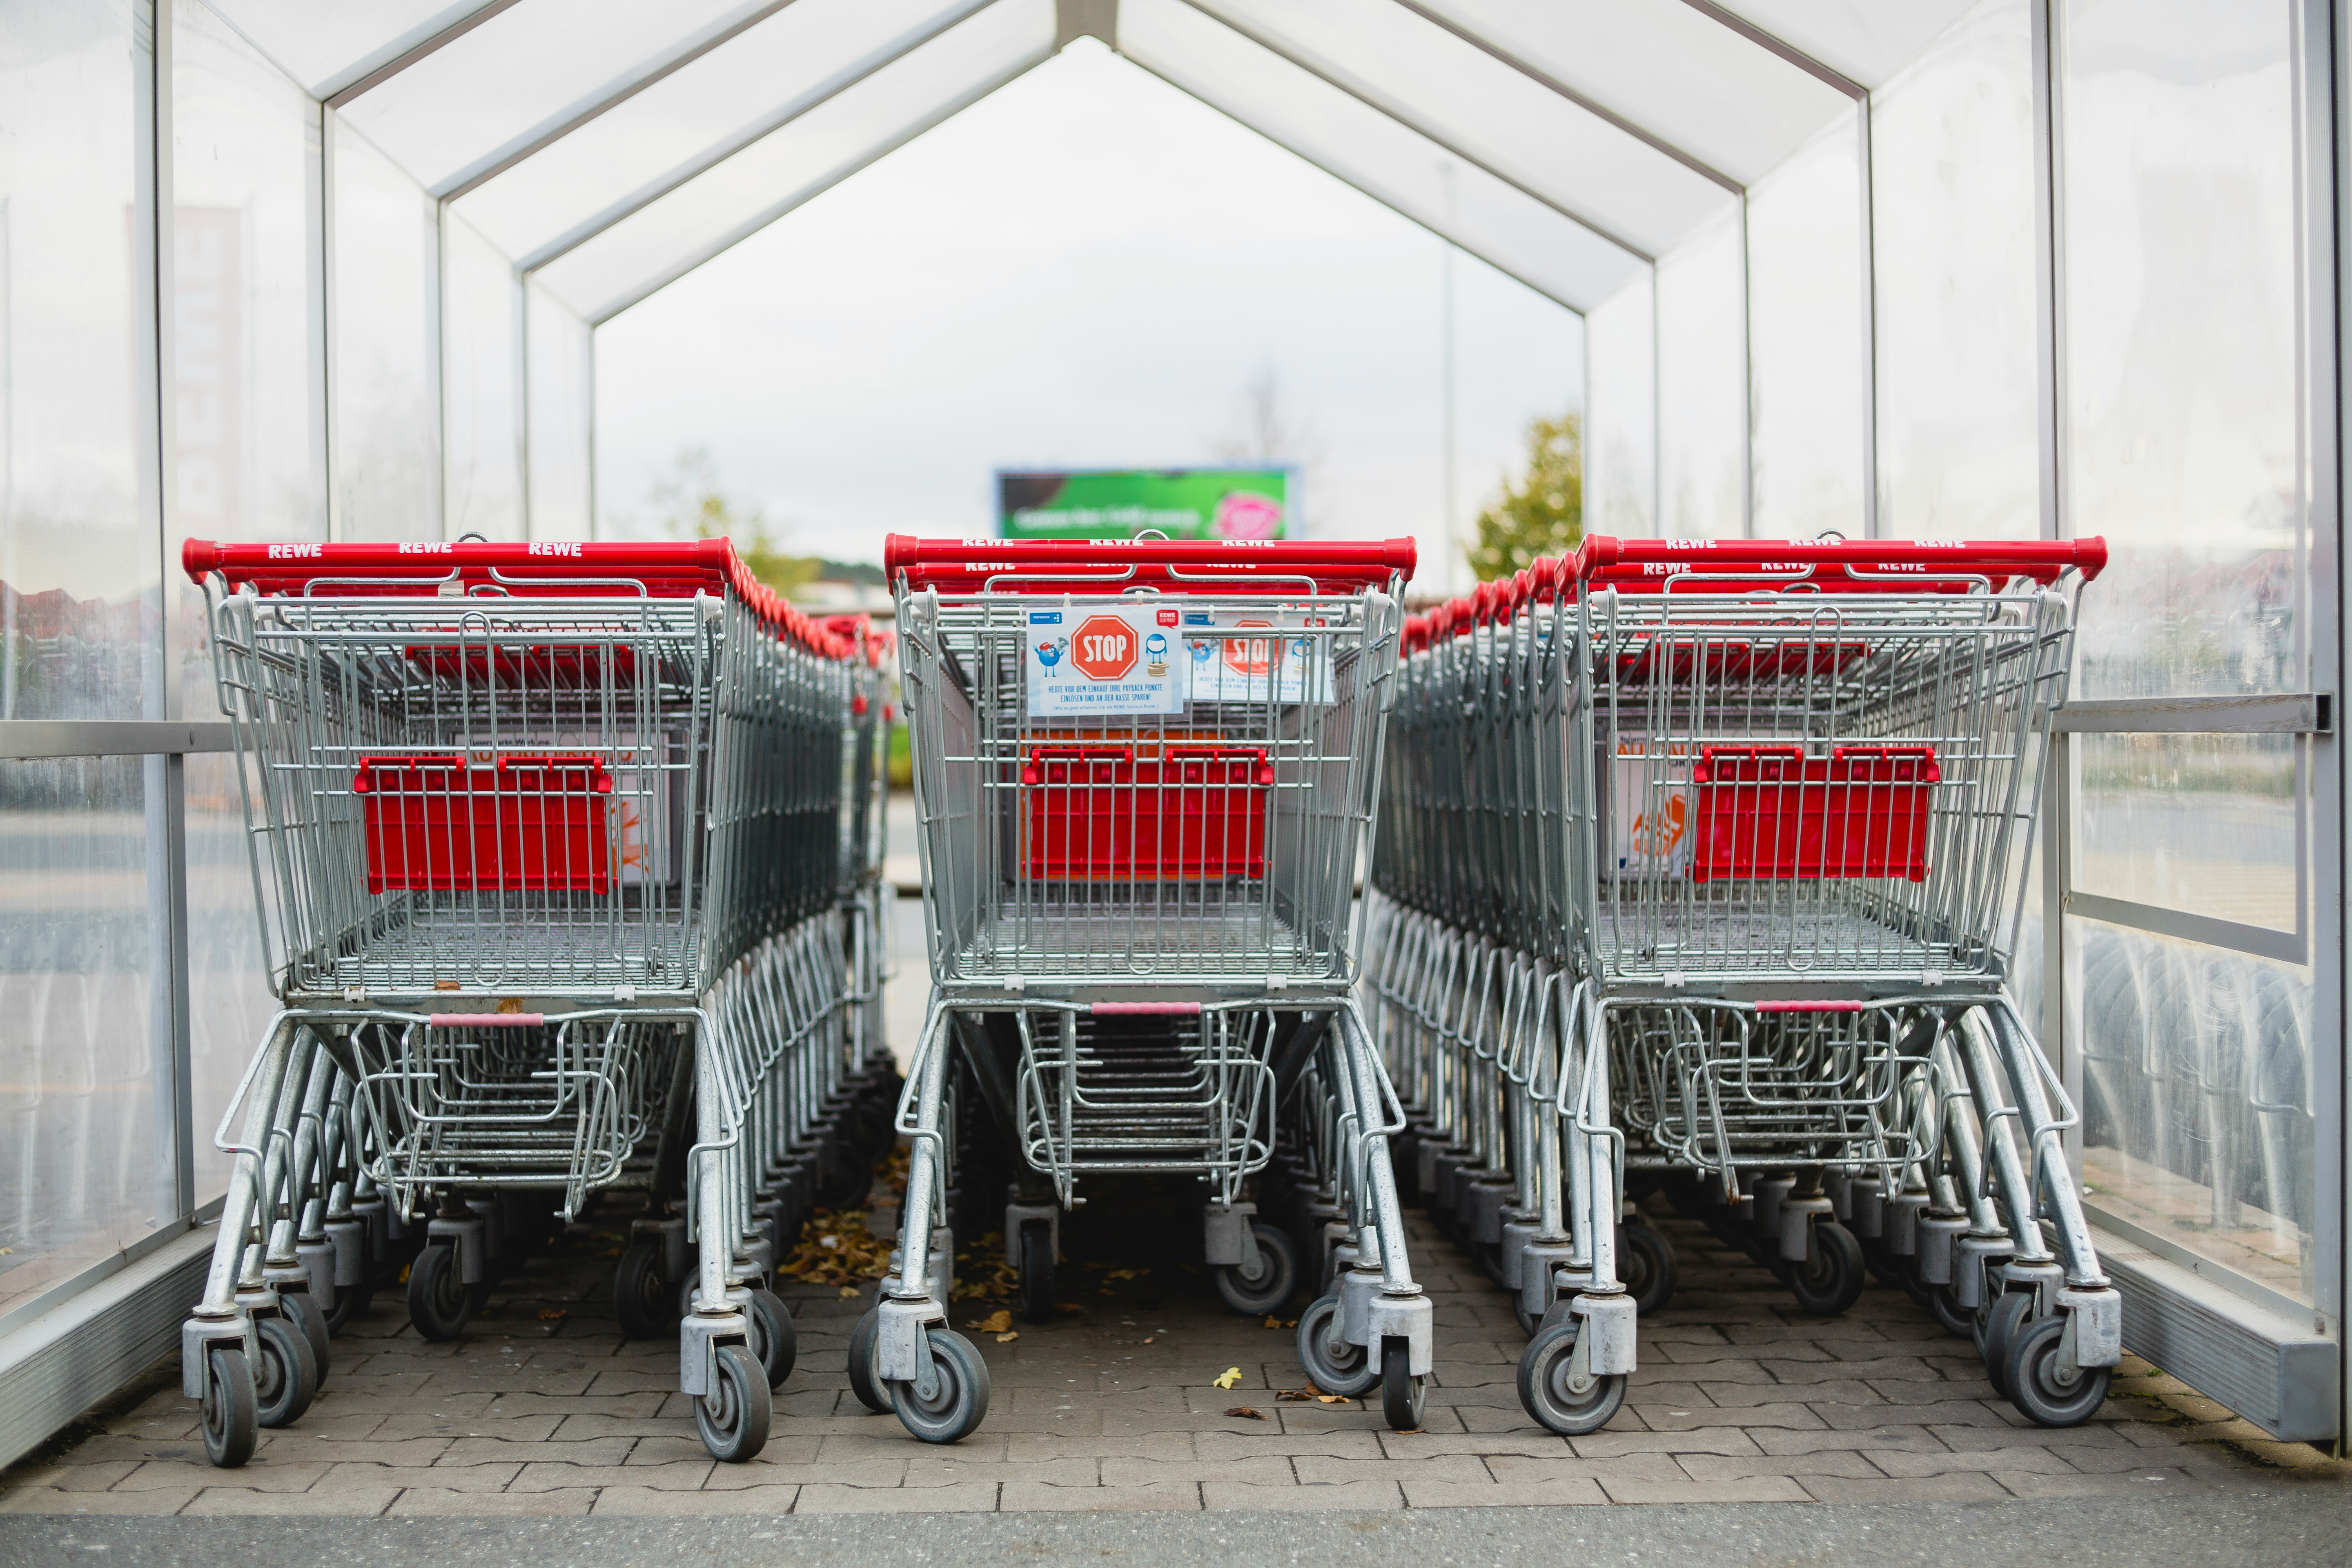

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Dataset
df = pd.read_csv('retail_sales_dataset.csv')
df

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50           150  
1           2             500          1000  
2           1              30            30  
3           1             500           500  
4           2              50           100  
..        ...             ...           ...  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  

[1000 rows x 9 columns]

In [3]:
#Drop null values
df.dropna()
df

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50           150  
1           2             500          1000  
2           1              30            30  
3           1             500           500  
4           2              50           100  
..        ...             ...           ...  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  

[1000 rows x 9 columns]

## Summary Statistics

In [4]:
df['Total Amount'].mean()

456.0

In [5]:
df['Total Amount'].median()

135.0

In [6]:
df['Total Amount'].mode()

0    50
Name: Total Amount, dtype: int64

In [7]:
df['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

<AxesSubplot:xlabel='Total Amount'>

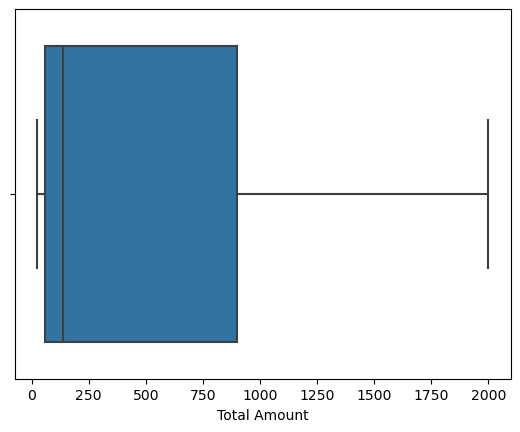

In [8]:
sns.boxplot(x=df['Total Amount'])

In [25]:
q1 = np.quantile(df['Total Amount'], 0.25)
q3 = np.quantile(df['Total Amount'], 0.75)
iqr = q3 - q1
print('q1 = ', q1)
print('q3 = ', q3)
print('iqr = ', iqr)

q1 =  60.0
q3 =  900.0
iqr =  840.0


In [26]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print('lower = ', lower)
print('upper = ', upper)

lower =  -1200.0
upper =  2160.0


In [27]:
outliers = df[(df['Total Amount'] < lower) | (df['Total Amount'] > upper)]

In [29]:
outliers

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

## Visualization

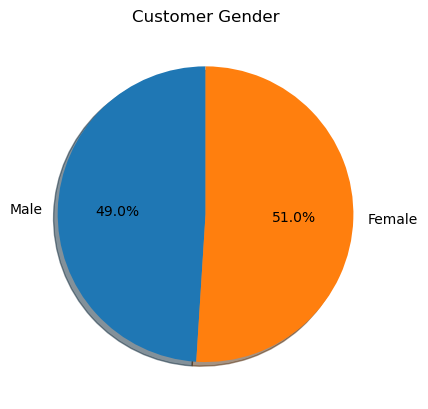

In [9]:
#Male vs Female Customer
labels = 'Male', 'Female'
male = sum(df['Gender'] == 'Male')
female = sum(df['Gender'] == 'Female')
sizes = [male, female]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
ax.set_title('Customer Gender')
plt.show()

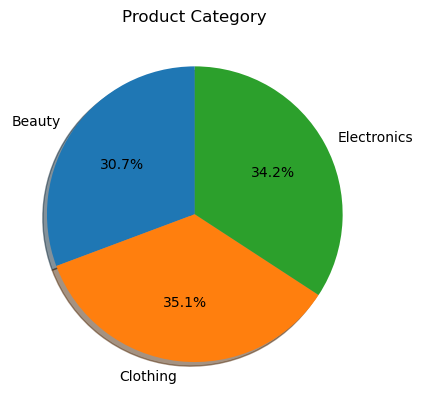

In [10]:
#Top Product Category
labels_2 = 'Beauty', 'Clothing', 'Electronics'
beauty = sum(df['Product Category'] == 'Beauty')
clothing = sum(df['Product Category'] == 'Clothing')
electric = sum(df['Product Category'] == 'Electronics')
sizes_2 = [beauty, clothing, electric]

fig, ax = plt.subplots()
ax.pie(sizes_2, labels=labels_2, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
ax.set_title('Product Category')
plt.show()

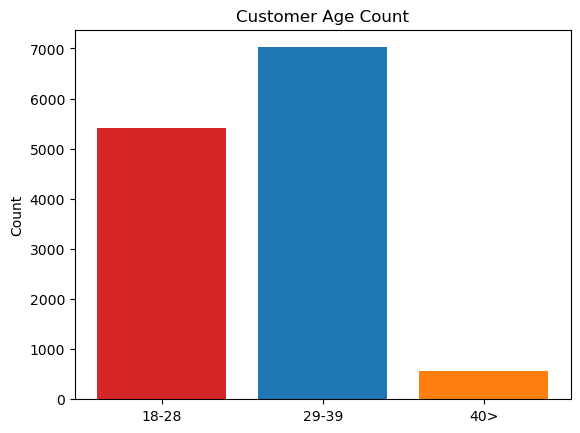

In [11]:
#Customer Age

# Convert 'Age' column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter and sum based on age groups
age18_28 = df[(df['Age'] >= 18) & (df['Age'] <= 28)]['Age'].sum()
age29_39 = df[(df['Age'] >= 29) & (df['Age'] <= 39)]['Age'].sum()
age40up = df[df['Age'] >= 40]['Age'].count()


fig, ax = plt.subplots()

age_category = ['18-28', '29-39', '40>']
counts = [age18_28, age29_39, age40up]
bar_labels = ['18-28', '29-39', '40>']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(age_category, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Customer Age Count')

plt.show()